<p align="center">
  <img src="./task.jpg" width=720px>
</p>

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import math

from typing import Callable

In [82]:
def get_h(n: int) -> float: return 2 / 2**n 

h = [get_h(n) for n in range(1, 22)]
log_h = [np.log2(h) for h in h]

In [83]:
def df_errors_dep_on_h(calc_method: Callable[[Callable[[float], float], float, float], float], 
                       function:    Callable[[float], float], 
                       derivative:  Callable[[float], float],
                       h: float, x=0) -> list[float]:

  method = [calc_method(function, x, h) for h in h] 
  real   = [derivative(x) for h in h]

  return [abs(m - r) for m, r in zip(method, real)]

In [84]:
method_1 = lambda func, x, h: (func(x + h) - func(x)) / h
method_2 = lambda func, x, h: (func(x) - func(x - h)) / h
method_3 = lambda func, x, h: (func(x + h) - func(x - h)) / (2 * h)
method_4 = lambda func, x, h: 4/3 * (func(x + h) - func(x - h)) / (2 * h) - 1/3 * (func(x + 2*h) - func(x - 2*h)) / (4 * h)
method_5 = lambda func, x, h: 3/2 * (func(x + h) - func(x - h)) / (2 * h) - 3/5 * (func(x + 2*h) - func(x - 2*h)) / (4 * h) + 1/10 * (func(x + 3*h) - func(x - 3*h)) / (6 * h)

In [85]:
function_1   = lambda x: np.sin(x**2)
derivative_1 = lambda x: np.cos(x**2) * 2 * x

function_2   = lambda x: np.cos(np.sin(x))
derivative_2 = lambda x: -np.sin(np.sin(x)) * np.cos(x)

function_3   = lambda x: np.exp(np.sin(np.cos(x)))
derivative_3 = lambda x: np.exp(np.sin(np.cos(x))) * np.cos(np.cos(x)) * -np.sin(x)

function_4   = lambda x: np.log(x + 3)
derivative_4 = lambda x: 1 / (x + 3)

function_5   = lambda x: (x + 3)**0.5
derivative_5 = lambda x: 1 / (2 * (x + 3)**0.5)

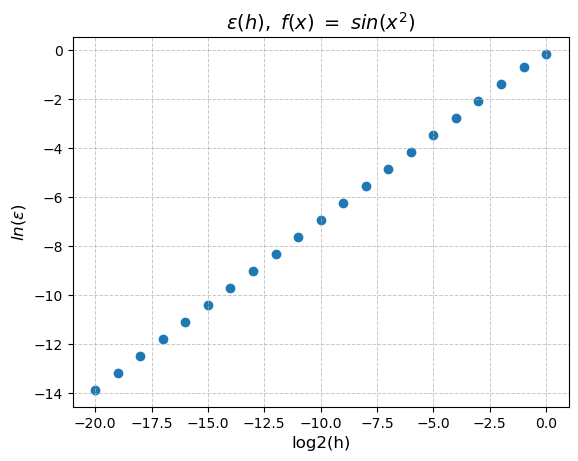

In [86]:
plt.xlabel("log2(h)", fontsize=12)
plt.ylabel(r"$ln(\varepsilon)$", fontsize=12)

plt.grid(True, which="both", ls="--", linewidth=0.7, alpha=0.7)

errors_1 = df_errors_dep_on_h(method_1, function_1, derivative_1, h)
plt.scatter(log_h, [np.log(e) for e in errors_1])

plt.title(r"$\varepsilon(h), ~f(x) ~= ~sin(x^2)$", fontsize=14)
plt.show()

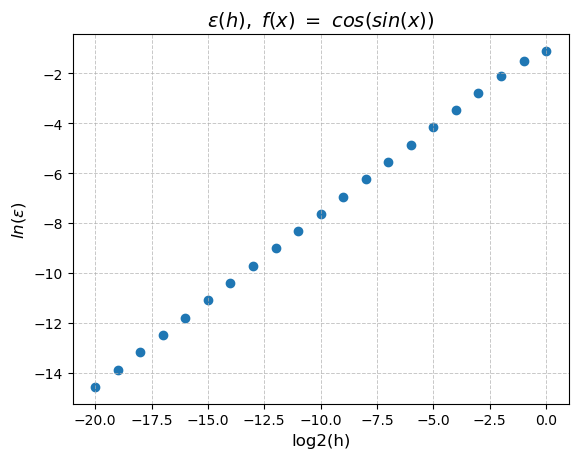

In [87]:
plt.xlabel("log2(h)", fontsize=12)
plt.ylabel(r"$ln(\varepsilon)$", fontsize=12)

plt.grid(True, which="both", ls="--", linewidth=0.7, alpha=0.7)

errors_2 = df_errors_dep_on_h(method_2, function_2, derivative_2, h)
plt.scatter(log_h, [np.log(e) for e in errors_2])

plt.title(r"$\varepsilon(h), ~f(x) ~= ~cos(sin(x))$", fontsize=14)
plt.show()

[np.float64(0.38083152697032263), np.float64(0.12218226797221843), np.float64(0.03300159354572263), np.float64(0.008421015163987855), np.float64(0.002116212309936971), np.float64(0.0005297427117387787), np.float64(0.00013247885440859086), np.float64(3.312241329678223e-05), np.float64(8.280772062052577e-06), np.float64(2.0702035332664792e-06), np.float64(5.175515245259277e-07), np.float64(1.2938793969574647e-07), np.float64(3.2346901379654014e-08), np.float64(8.08658495721204e-09), np.float64(2.022983780491927e-09), np.float64(5.059466179346828e-10), np.float64(1.239588431900529e-10), np.float64(3.664735181985179e-11), np.float64(7.008393865248763e-12), np.float64(2.209543659148494e-11), np.float64(2.209543659148494e-11)]


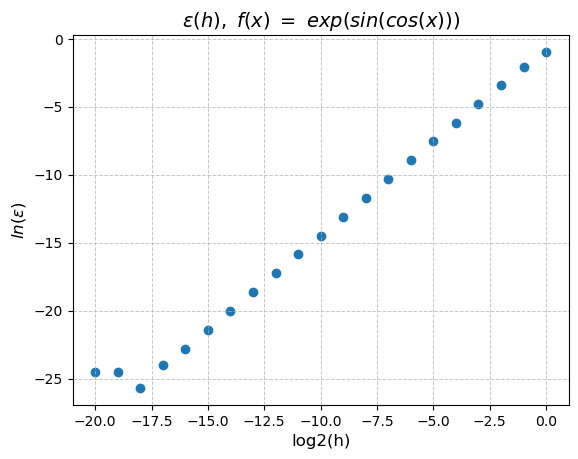

In [88]:
plt.xlabel("log2(h)", fontsize=12)
plt.ylabel(r"$ln(\varepsilon)$", fontsize=12)

plt.grid(True, which="both", ls="--", linewidth=0.7, alpha=0.7)

errors_3 = df_errors_dep_on_h(method_3, function_3, derivative_3, h, x = 1)
print(errors_3)
plt.scatter(log_h, [np.log(e) for e in errors_3])

plt.title(r"$\varepsilon(h), ~f(x) ~= ~exp(sin(cos(x)))$", fontsize=14)
plt.show()

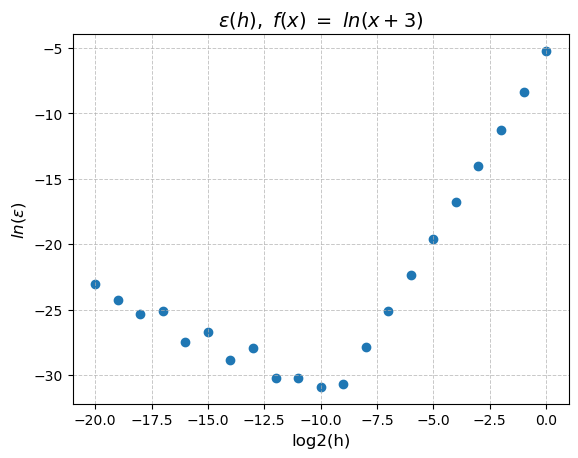

In [89]:
plt.xlabel("log2(h)", fontsize=12)
plt.ylabel(r"$ln(\varepsilon)$", fontsize=12)

plt.grid(True, which="both", ls="--", linewidth=0.7, alpha=0.7)

errors_4 = df_errors_dep_on_h(method_4, function_4, derivative_4, h)
plt.scatter(log_h, [np.log(e) for e in errors_4])

plt.title(r"$\varepsilon(h), ~f(x) ~= ~ln(x+3)$", fontsize=14)
plt.show()

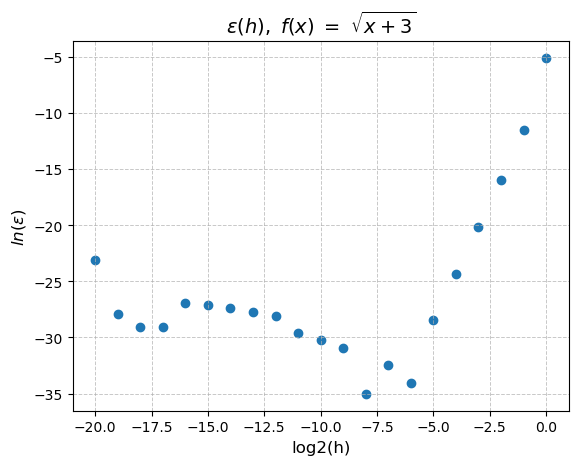

In [90]:
plt.xlabel("log2(h)", fontsize=12)
plt.ylabel(r"$ln(\varepsilon)$", fontsize=12)

plt.grid(True, which="both", ls="--", linewidth=0.7, alpha=0.7)

errors_5 = df_errors_dep_on_h(method_5, function_5, derivative_5, h)
plt.scatter(log_h, [np.log(e) for e in errors_5])

plt.title(r"$\varepsilon(h), ~f(x) ~= ~\sqrt{x+3}$", fontsize=14)
plt.show()